In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#immport the sklearn packages
from sklearn.model_selection import train_test_split


In [3]:
#load the data
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
#check the null values
train.isnull().any().sum()

0

In [5]:
#test set null values
test.isnull().any().sum()

0

In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
#label is the target column, So find how many unique values are there in the traget
traget_values = sorted(list(train['label'].unique()))
traget_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
# split it up as to train and test
#----------------------------------
X = train.iloc[:,1:]
y=train.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)
print("Shape of the X_train----> ",X_train.shape)
print("Shape of the y_train----> ",y_train.shape)
print("Shape of the X_test----> ",X_test.shape)
print("Shape of the y_test----> ",y_test.shape)

Shape of the X_train---->  (31500, 784)
Shape of the y_train---->  (31500,)
Shape of the X_test---->  (10500, 784)
Shape of the y_test---->  (10500,)


Normalize the value

In [10]:
# Normalize the value
X_train = X_train/255.0
X_test = X_test/255.0

test = test/255.0

# Reshape

The data should be reshaped to image matrix format before trained by CNN.

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

test = test.values.reshape(-1,28,28,1)

In [12]:
# see how many target values are there
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

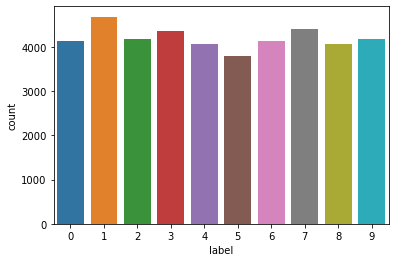

In [13]:
sns.countplot(train['label'])

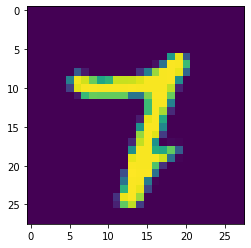

In [14]:
plt.imshow(X_train[0][:,:,0])

One hot Encoding the target value 
---------> change 2 -----> [0,0,1,0,0,0,0,0,0]

In [15]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [26]:
# Data Agumentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

# CNN Model

In [27]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers.schedules import ExponentialDecay
sns.set(style = 'white', context= 'notebook', palette = 'deep')

In [28]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64 , kernel_size =(3,3),padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) , padding = 'Same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (3,3)))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

# Configure the the model

In [29]:
#Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

In [30]:
model.compile(optimizer  = optimizer , loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 32)         

### Early stoping -- useful to reduce overfitting
1) this is the point where afer this dont need to train my model. once I have reached a point where it is no longer necessary to continue training.

2) we need validation dataset to mark this callback. 


In [32]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
                            monitor="val_loss", # to see the metrics
                            min_delta=0, # minimium amount of change to count as an improvement
                            patience=15, # how many epoch to see before stop
                            restore_best_weights=True
                            )

### Learning Rate Decay

Reduce the laerning rate when the metric stop improving.
which can be done in 2 ways:

1)LearningRateScheduler - with this we can pass a function , which will set the LR for each epochs.

2)ReduceLROnPlateau - Readuce the learning rate by 'factor' when no improvement found on 'monitors' for a 'patience' number of epochs. 

In [35]:
from keras.callbacks import ReduceLROnPlateau

reduce_learningRate = ReduceLROnPlateau(monitor="val_loss",
                                       plateau = 4,
                                       factor = 5e-7,
                                       verbose=1, # update the message
                                       min_lr=0.00001)

# Fit the model

In [37]:
# the global variables
epochs = 30

batch_size =64


In [40]:
#fit the model
history = model.fit_generator( datagen.flow(X_train,y_train,batch_size = batch_size),
                             epochs = epochs,
                             validation_data = (X_test,y_test),
                             verbose = 1,
                             steps_per_epoch = X_train.shape[0] // batch_size,
                             callbacks = [reduce_learningRate , early_stop])

Epoch 1/30
492/492 [==============================] - 43s 87ms/step - loss: 0.2900 - accuracy: 0.9136 - val_loss: 0.7863 - val_accuracy: 0.6961
Epoch 2/30
492/492 [==============================] - 43s 87ms/step - loss: 0.0966 - accuracy: 0.9707 - val_loss: 0.0700 - val_accuracy: 0.9787
Epoch 3/30
492/492 [==============================] - 42s 86ms/step - loss: 0.0793 - accuracy: 0.9758 - val_loss: 0.0359 - val_accuracy: 0.9883
Epoch 4/30
492/492 [==============================] - 42s 86ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 5/30
492/492 [==============================] - 43s 87ms/step - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.0494 - val_accuracy: 0.9839
Epoch 6/30
492/492 [==============================] - 42s 86ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0468 - val_accuracy: 0.9870
Epoch 7/30
492/492 [==============================] - 42s 85ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0240 - val_accuracy:

### Predict test data

In [41]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [42]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_digit_recog.csv",index=False)